In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\user\\Desktop\\data sets\\Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df=df.iloc[:,6:]
df = df.drop(columns =['Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember'])
df.head()

,Age,EstimatedSalary,Exited
0,42,101348.88,1
1,41,112542.58,0
2,42,113931.57,1
3,39,93826.63,0
4,43,79084.10,0


# Train test split

In [5]:
x = df.iloc[:,:2]
y = df['Exited']

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.04,random_state=5)

In [7]:
x_train.shape,x_test.shape

((9600, 2), (400, 2))

# StandardScaler

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [9]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [10]:
scaler.mean_

array([3.89247917e+01, 1.00228062e+05])

In [11]:
x_train.head()

,Age,EstimatedSalary
8189,21,68666.63
8663,39,28184.70
9012,41,121098.65
1897,37,82351.06
4840,35,93825.78


In [12]:
x_train_scaled

array([[-1.70936966, -0.54838796],
       [ 0.00717212, -1.25177184],
       [ 0.19789899,  0.36263179],
       ...,
       [-0.75573533, -1.52362127],
       [-0.27891817,  1.25576737],
       [ 1.24689674, -1.09443178]])

In [13]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled , columns = x_train.columns)

In [14]:
x_train_scaled.head()

,Age,EstimatedSalary
0,-1.709370,-0.548388
1,0.007172,-1.251772
2,0.197899,0.362632
3,-0.183555,-0.310617
4,-0.374282,-0.111241


In [15]:
np.round(x_train.describe(),2)

,Age,EstimatedSalary
count,9600.00,9600.00
mean,38.92,100228.06
std,10.49,57556.11
min,18.00,11.58
25%,32.00,51136.84
50%,37.00,100444.88
75%,44.00,149552.92
max,92.00,199992.48


In [16]:
np.round(x_train_scaled.describe(),2)

,Age,EstimatedSalary
count,9600.00,9600.00
mean,0.00,-0.00
std,1.00,1.00
min,-2.00,-1.74
25%,-0.66,-0.85
50%,-0.18,0.00
75%,0.48,0.86
max,5.06,1.73


# Effect of scaling 

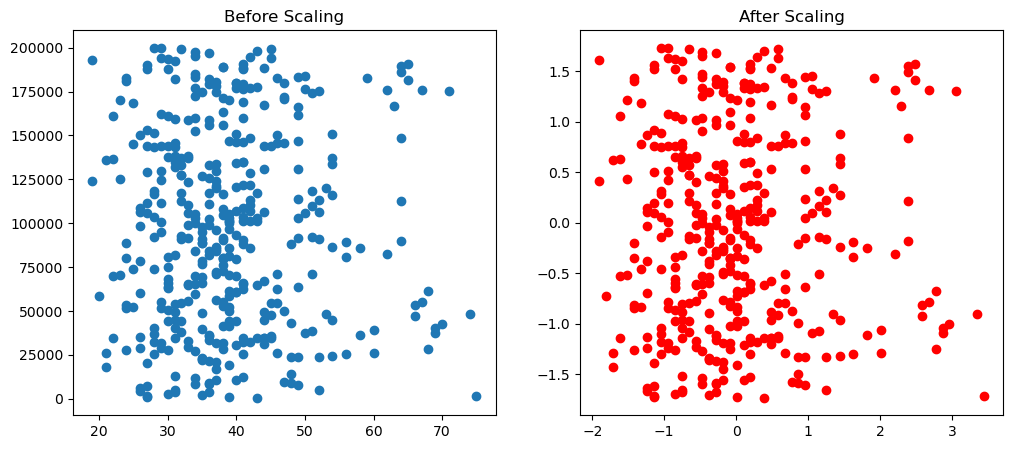

In [17]:
fig , (ax1,ax2) = plt.subplots(ncols=2 ,figsize =(12,5))

# Before scaling
ax1.scatter(x_test['Age'],x_test['EstimatedSalary'])
ax1.set_title('Before Scaling')

# After scaling
ax2.scatter(x_test_scaled['Age'],x_test_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Scaling')
plt.show()

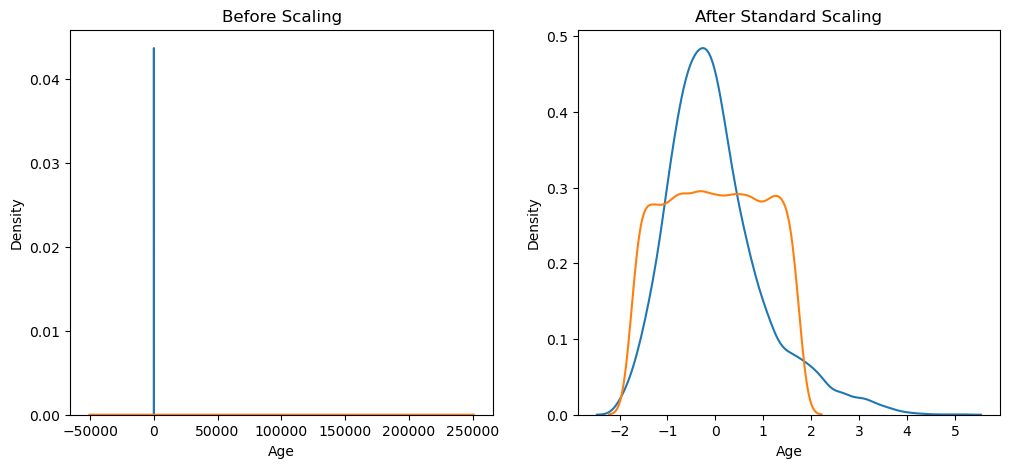

In [18]:
fig, (ax1,ax2) =plt.subplots(ncols=2 , figsize=(12,5))

# Before scaling 
ax1.set_title('Before Scaling')
sns.kdeplot(x_test['Age'] , ax=ax1)
sns.kdeplot(x_test['EstimatedSalary'],ax=ax1)

# After scaling
ax2.set_title("After Standard Scaling")
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled["EstimatedSalary"],ax=ax2)
plt.show()

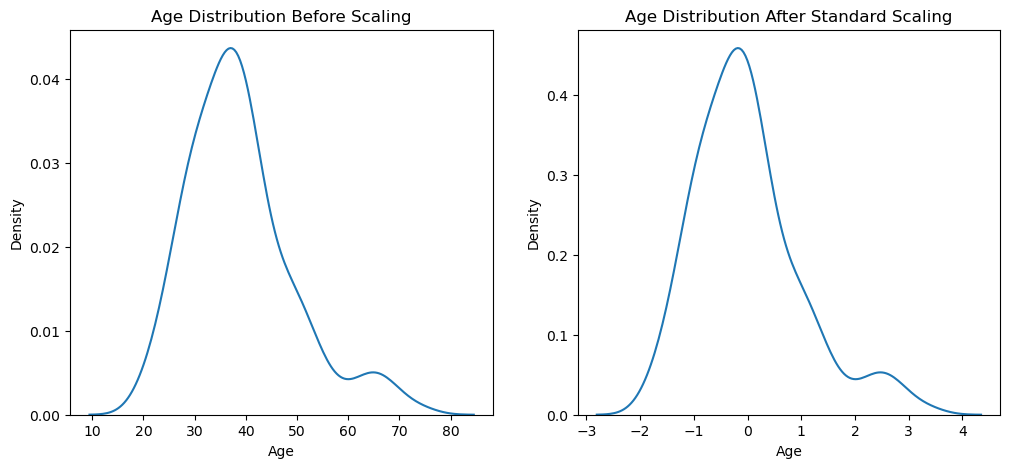

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_test['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(x_test_scaled['Age'], ax=ax2)
plt.show()

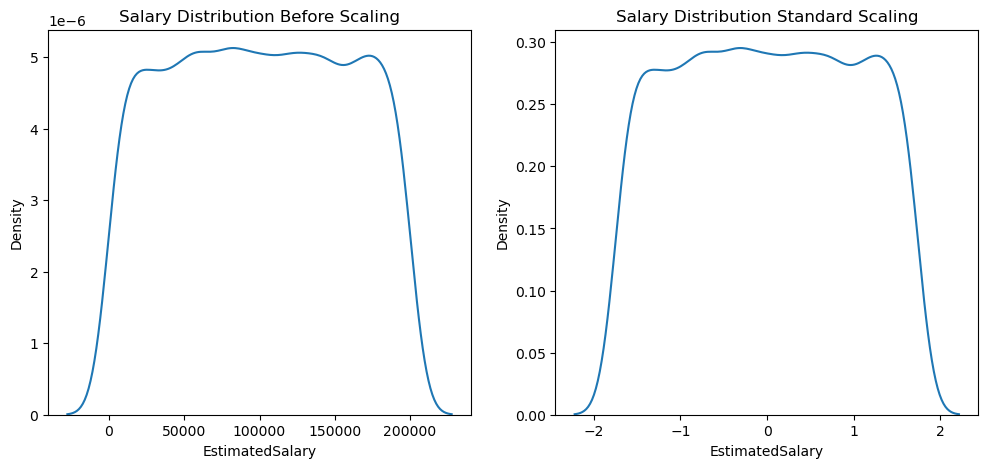

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Why scaling is important?

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [22]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [23]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
print('Before_sc',accuracy_score(y_test,y_pred))
print('After_sc',accuracy_score(y_test,y_pred_scaled))

Before_sc 0.8
After_sc 0.7725


In [26]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [27]:
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [28]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [29]:
print('Before_sc',accuracy_score(y_test,y_pred))
print('After_sc',accuracy_score(y_test,y_pred_scaled))

Before_sc 0.7575
After_sc 0.76


# Effect of Outlier

In [30]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)
df

C:\Users\user\AppData\Local\Temp\ipykernel_8492\4162112257.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


,Age,EstimatedSalary,Exited,Purchased
0,42,101348.88,1.0,NaN
1,41,112542.58,0.0,NaN
2,42,113931.57,1.0,NaN
3,39,93826.63,0.0,NaN
4,43,79084.10,0.0,NaN
...,...,...,...,...
9998,42,92888.52,1.0,NaN
9999,28,38190.78,0.0,NaN
10000,5,1000.00,NaN,0.0
10001,90,250000.00,NaN,1.0


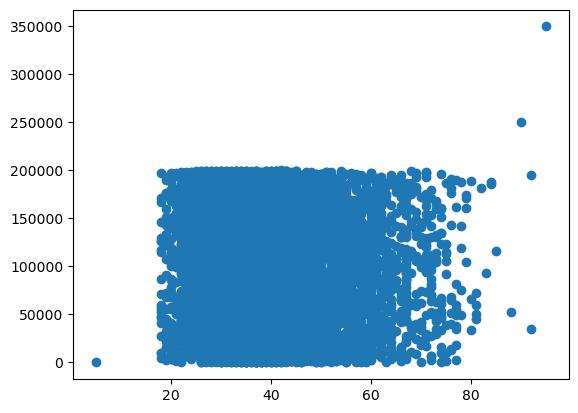

In [31]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.01,
                                                    random_state=0)

X_train.shape, X_test.shape

((9902, 3), (101, 3))

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

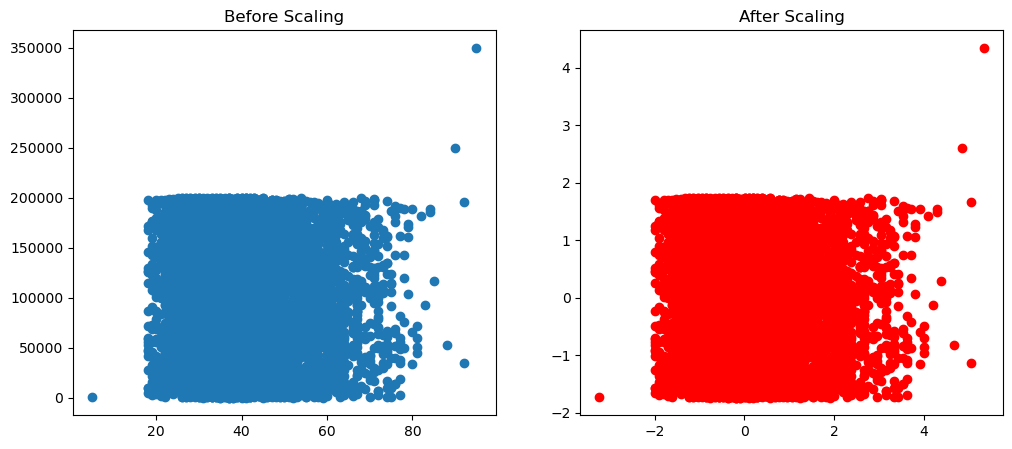

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()


In [36]:
# no effect on outlier on machine 